In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

In [2]:
# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# Normalize pixel values to range between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the images from 2D (28x28) to 1D (784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Print the shapes of the arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Determine the minimum and maximum pixel values for images in X_train
min_pixel_value = np.min(X_train)
max_pixel_value = np.max(X_train)

# Make copies of the original dataset for binary classification task.
Y_train = np.copy(Y_train)
Y_test = np.copy(Y_test)

# Check unique values in the original Y_test before conversion
print("Unique values in original Y_test:", np.unique(Y_test))
# YOUR CODE HERE
Y_train.shape
Y_train[Y_train != 7] = 0
Y_train[Y_train == 7] = 1
Y_test[Y_test != 7] = 0
Y_test[Y_test == 7] = 1
np.unique(Y_test)

# YOUR CODE HERE
X_train_mini, X_val, Y_train_mini, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1234)

print("Shape of X_train_mini:", X_train_mini.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_train_mini:", Y_train_mini.shape)
print("Shape of Y_val:", Y_val.shape)

np.random.seed(0)
# YOUR CODE HERE

# Generate a list of shuffled indices
num_samples = len(X_train_mini)
shuffled_indices = np.random.permutation(num_samples)

# Reorder X_train_mini and Y_train_mini using shuffled indices
X_train_mini = X_train_mini[shuffled_indices]
Y_train_mini = Y_train_mini[shuffled_indices]
print(X_train_mini.shape)
print(Y_train_mini.shape)

4422102/4422102 [==============================] - 0s 0us/step
Shape of X_train: (60000, 784)
Shape of X_test: (10000, 784)
Unique values in original Y_test: [0 1 2 3 4 5 6 7 8 9]
Shape of X_train_mini: (48000, 784)
Shape of X_val: (12000, 784)
Shape of Y_train_mini: (48000,)
Shape of Y_val: (12000,)
(48000, 784)
(48000,)


In [3]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
        units=1,                       # Single output unit for binary classification
        input_shape=(num_features,),   # Input shape should match the number of features
        use_bias=True,                 # Use bias (intercept)
        activation='sigmoid',          # Sigmoid activation function for binary classification
        kernel_initializer=tf.keras.initializers.Ones(),  # Initialize weights to 1
        bias_initializer=tf.keras.initializers.Ones()     # Initialize bias to 1
  ))


  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch SGD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

  return model

# Set the learning rate
learning_rate = 0.01

# Build and compile the model
model_tf2 = build_model(num_features=X_train_mini.shape[1], learning_rate=learning_rate)

num_epochs = 20
batch_size = 32

history2 = model_tf2.fit(X_train_mini, Y_train_mini,
                       epochs=num_epochs,
                       batch_size=batch_size,
                       validation_data=(X_val, Y_val))

train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(train_loss2) + 1)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 19.2664 - accuracy: 0.7237 - val_loss: 0.6340 - val_accuracy: 0.9037
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4705 - accuracy: 0.9193 - val_loss: 0.3828 - val_accuracy: 0.9284
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3232 - accuracy: 0.9331 - val_loss: 0.2893 - val_accuracy: 0.9377
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2523 - accuracy: 0.9424 - val_loss: 0.2350 - val_accuracy: 0.9438
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2099 - accuracy: 0.9479 - val_loss: 0.1997 - val_accuracy: 0.9475
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1820 - accuracy: 0.9523 - val_loss: 0.1727 - val_accuracy: 0.9523
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1624 - accuracy: 0.9554 - val_loss: 0.1550 - val_accuracy

In [4]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Implement data balancing techniques
# Oversampling the minority class (sneaker class)
oversampler = RandomOverSampler()
X_train_balanced, Y_train_balanced = oversampler.fit_resample(X_train_mini, Y_train_mini)

# Undersampling the majority class (non-sneaker class)
undersampler = RandomUnderSampler()
X_train_balanced, Y_train_balanced = undersampler.fit_resample(X_train_balanced, Y_train_balanced)

# Retrain the model on the balanced dataset
model_tf2.fit(X_train_balanced, Y_train_balanced, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, Y_val))

# Evaluate the model's performance
test_loss_balanced, test_accuracy_balanced = model_tf2.evaluate(X_test, Y_test)

print("Accuracy on Test Dataset (Balanced):", test_accuracy_balanced)

Epoch 1/20
2700/2700 [==============================] - 8s 3ms/step - loss: 0.1417 - accuracy: 0.9537 - val_loss: 0.1350 - val_accuracy: 0.9480
Epoch 2/20
2700/2700 [==============================] - 4s 2ms/step - loss: 0.1264 - accuracy: 0.9571 - val_loss: 0.1166 - val_accuracy: 0.9542
Epoch 3/20
2700/2700 [==============================] - 6s 2ms/step - loss: 0.1167 - accuracy: 0.9604 - val_loss: 0.1083 - val_accuracy: 0.9570
Epoch 4/20
2700/2700 [==============================] - 5s 2ms/step - loss: 0.1095 - accuracy: 0.9630 - val_loss: 0.1144 - val_accuracy: 0.9557
Epoch 5/20
2700/2700 [==============================] - 5s 2ms/step - loss: 0.1039 - accuracy: 0.9649 - val_loss: 0.1032 - val_accuracy: 0.9596
Epoch 6/20
2700/2700 [==============================] - 11s 4ms/step - loss: 0.0994 - accuracy: 0.9664 - val_loss: 0.0998 - val_accuracy: 0.9613
Epoch 7/20
2700/2700 [==============================] - 11s 4ms/step - loss: 0.0957 - accuracy: 0.9680 - val_loss: 0.0971 - val_accurac

313/313 [==============================] - 1s 4ms/step


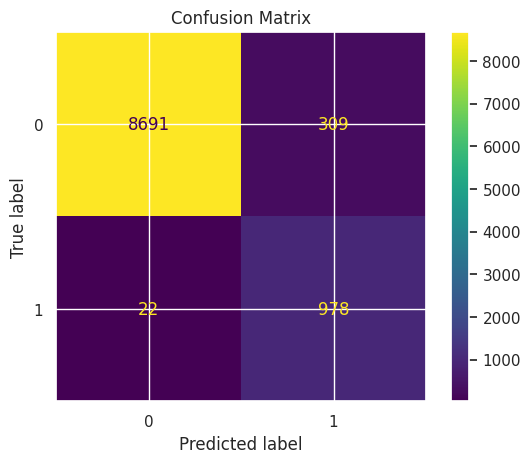

True Positives (TP): 978
False Negatives (FN): 22
False Positives (FP): 309
True Negatives (TN): 8691
Subgroup Accuracy for Sneaker Class: 0.978
Subgroup Accuracy for Non-Sneaker Class: 0.9656666666666667


In [5]:
# Obtain predictions on the test dataset
y_pred = (model_tf2.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate TP, FN, FP, TN
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]

print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)

# Compute subgroup accuracy separately for sneaker and non-sneaker classes
sneaker_indices = np.where(Y_test == 1)[0]
non_sneaker_indices = np.where(Y_test == 0)[0]

sneaker_accuracy = np.mean(y_pred[sneaker_indices] == Y_test[sneaker_indices])
non_sneaker_accuracy = np.mean(y_pred[non_sneaker_indices] == Y_test[non_sneaker_indices])

print("Subgroup Accuracy for Sneaker Class:", sneaker_accuracy)
print("Subgroup Accuracy for Non-Sneaker Class:", non_sneaker_accuracy)